# Particle type classification

Welcome! 

In this challenge we want to build a machine learning model to help us recognize particles. Particles are the tiny constituant of matter generated in a collision between proton bunches at the Large Hadron Collider at CERN. 

Particles are of course of different types and identifying which particle was produced in an extremly important task for particle physicists. 

Our dataset comprises 350 independent simulated events, where each event contains labelled images of particle trajectories. 

A good model assigns the correct particle type to any particle, even the least frequent ones.

Read throught this notebook to discover more about the particles.

In [1]:
#Import libraries to load and process data
import numpy as np
import pickle

In [2]:
# replace by your own file path
pkl_file = open('event1.pkl', 'rb')
event1 = pickle.load(pkl_file)

In [3]:
# get the data and target
data,target=event1[0],event1[1]
target=target.astype('int')

In [57]:
# code to particle name dictionary -- more here : 
dic_types={11: "electron", 13 : "muon", 211:"pion", 321:"kaon",2212 : "proton"}

## Example  of a particle

In [74]:
import matplotlib.pyplot as plt
for i in range(0:20):
    plt.title(dic_types[target[i]])
    plt.imshow(data[i])
    plt.show()

SyntaxError: invalid syntax (<ipython-input-74-1984aa953593>, line 2)

## Distribution of particles in an event

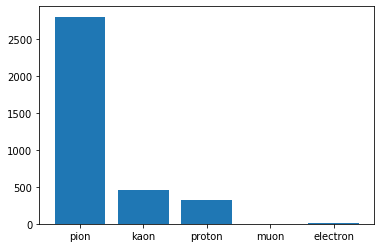

In [18]:

from collections import Counter

plt.bar(range(len(dic_types)),list(Counter(target).values()))
plt.xticks(range(len(dic_types)), [dic_types[i] for i in list(Counter(target).keys())])

plt.show()

In [15]:
np.amax(data)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# SVM

In [47]:
print(data)

[array([[3., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
 array([[5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]])
 array([[0., 0.,

Let us try to predict the particle type with an SVM model from the famous sklearn library. First we split the data into training and test sets.

In [50]:
from sklearn.model_selection import train_test_split

# we transform the 10x10 images into arrays of 100. You can play with that :) 
X_train, X_test, y_train, y_test = train_test_split(
    [np.concatenate((i)) for i in data], target, test_size=0.20, random_state=42)

In [51]:
#new shape of our data
np.array(X_train).shape, np.array(y_train).shape

((2878, 100), (2878,))

In [49]:
max(map(lambda x: x[0], X_train))

8.0

In [55]:
X_train

[array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([3., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 

In [53]:
# particle distribution in our training
Counter(y_train)

NameError: name 'Counter' is not defined

In [52]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
# particle distribution in our test
Counter(y_test)

Counter({321: 93, 211: 516, 2212: 77, 11: 2, 13: 1})

In [32]:
clf.score(X_test,y_test)

0.7489114658925979

The score is already pretty good ! Let's now try to focus on less frequent particle by removing the most redundant one, the "pion"

In [33]:
#we have now reduced our test sample ! 
idx_non_pion=np.where(y_test!=211)[0]
Counter(y_test[idx_non_pion])

Counter({321: 93, 2212: 77, 11: 2, 13: 1})

In [34]:
#let's see how our model behaves then

clf.score(np.array(X_test)[idx_non_pion],np.array(y_test)[idx_non_pion])

0.0

### oups !! Our model is actually really bad then...

In [35]:
#let's take a closer look at which particle type the model is predicting 
clf.predict(np.array(X_test)[idx_non_pion])

array([211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211,
       211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211,
       211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211,
       211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211,
       211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211,
       211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211,
       211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211,
       211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211,
       211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211,
       211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211,
       211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211,
       211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211,
       211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211,
       211, 211, 211, 211])

## It seems our model is overfitting by predicting only pions! Can you help improve it?